In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [11]:
H_leads, S_leads = np.load("./unrelaxed/dft/leads/hs_pl_k.npy")

In [12]:
H_leads.shape

(4, 648, 648)

In [13]:
data_folder = "./unrelaxed/output/lowdin/device"
load_path = os.path.join(data_folder, "hs_list_ii.pkl")

with open(load_path, "rb") as f:
    hs_list_ii = pickle.load(f)

for i, h in enumerate(hs_list_ii):
    print(f"h[{i}] shape: {h.shape}")

h[0] shape: (2, 3888, 3888)
h[1] shape: (2, 3168, 3168)
h[2] shape: (2, 3568, 3568)


In [14]:
pdos = np.load("./unrelaxed/output/no_lowdin/device/pdos_no_leads_se.npy")
de = 0.01
energies = np.arange(-3, 3 + de / 2.0, de).round(7)

(-1.5, 1.5)

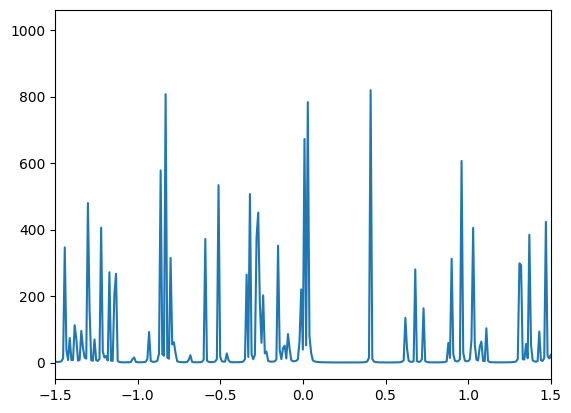

In [15]:
plt.plot(energies, np.sum(pdos, axis=1))
plt.xlim(-1.5,1.5)

(-1.5, 1.5)

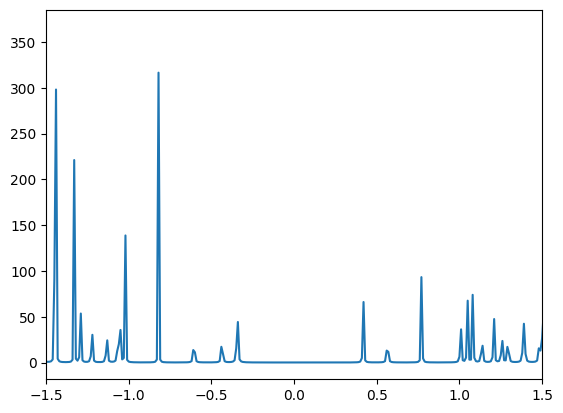

In [18]:
pdos = np.load("./unrelaxed/output/no_lowdin/bridge/pdos.npy")
plt.plot(energies, np.sum(pdos, axis=1))
plt.xlim(-1.5, 1.5)
# plt.yscale("log")

In [1]:
import numpy as np

data = [
    -0.91088,
    -0.85980,
    -0.50541,
    -0.50540,
    -0.21988,
     0.51209,
     0.80314,
     0.80315,
     1.18291,
     1.22505,
     1.22506,
     1.29787,
     1.29790,
     1.34322,
     1.34324
]

arr = np.array(data)
print(arr)


[-0.91088 -0.8598  -0.50541 -0.5054  -0.21988  0.51209  0.80314  0.80315
  1.18291  1.22505  1.22506  1.29787  1.2979   1.34322  1.34324]


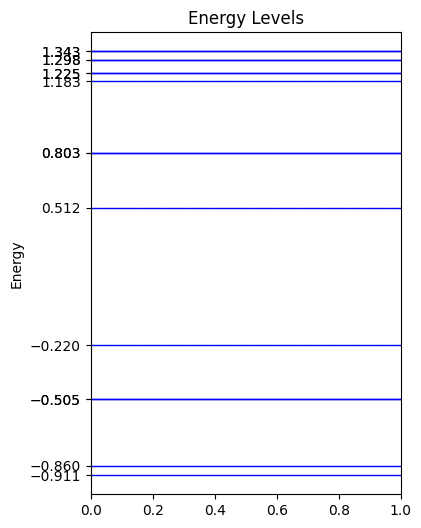

In [4]:
import matplotlib.pyplot as plt
x_start, x_end = 0, 1  # horizontal range for the lines

plt.figure(figsize=(4, 6))
for i, energy in enumerate(arr):
    plt.hlines(y=energy, xmin=x_start, xmax=x_end, colors='b', linewidth=1)

# plt.xlabel("State index (arbitrary)")
plt.ylabel("Energy")
plt.title("Energy Levels")
plt.ylim(min(arr) - 0.1, max(arr) + 0.1)
plt.xlim(x_start, x_end)
plt.yticks(np.round(arr, 3))
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [4]:
se1 = np.load("./unrelaxed/output/lowdin/self_energy.npy",allow_pickle=True)
se2 = np.load("./unrelaxed/output/lowdin/self_energy_two_rep.npy",allow_pickle=True)
se3 = np.load("./unrelaxed/output/lowdin/self_energy_three_rep.npy",allow_pickle=True)

In [5]:
energies = np.arange(-1, 1, 0.1)
s1 = np.array([se1[0].retarded(e) for e in energies])
s2 = np.array([se2[0].retarded(e) for e in energies])
s3 = np.array([se3[0].retarded(e) for e in energies])

In [6]:
s1.shape

(20, 648, 648)

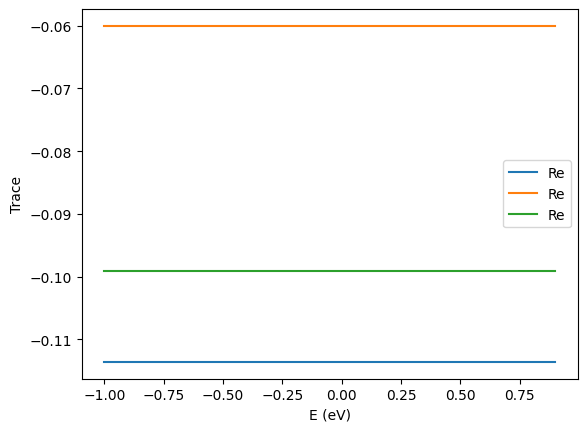

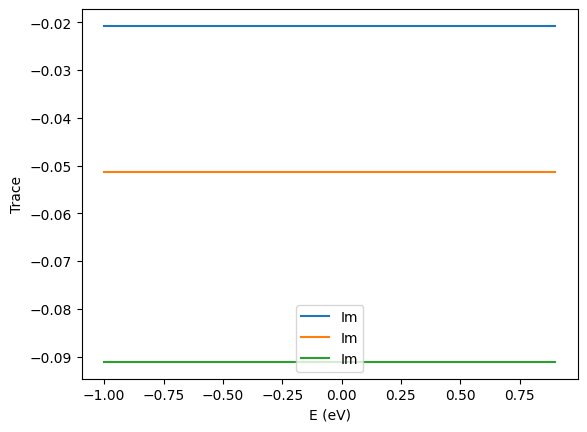

In [10]:
s1_trace = np.trace(s1[:,14:15,14:15], axis1=1, axis2=2)
s2_trace = np.trace(s2[:,14:15,14:15], axis1=1, axis2=2)
s3_trace = np.trace(s3[:,14:15,14:15], axis1=1, axis2=2)

plt.plot(energies,s1_trace.real,label="Re")
plt.plot(energies,s2_trace.real,label="Re")
plt.plot(energies,s3_trace.real,label="Re")
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Trace")
plt.show()
plt.plot(energies,s1_trace.imag,label="Im")
plt.plot(energies,s2_trace.imag,label="Im")
plt.plot(energies,s3_trace.imag,label="Im")
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Trace")
plt.show()

In [2]:
hs_los = np.load("unrelaxed/output/no_lowdin/device/hs_los.npy")
hs_lcao = np.load("unrelaxed/output/no_lowdin/device/hs_lcao.npy")
print(hs_los.shape, hs_lcao.shape)

(2, 1, 10656, 10656) (2, 1, 10656, 10656)
